In [1]:
%load_ext autoreload
%autoreload 2
import os,sys
# ############################################################
# ### SPECIFIC FOR CUSTOM KERNEL FOR TF1
# ############################################################
sys.path.remove('/opt/xpu/python3.7')
sys.path.remove('/opt/mdsplus/7-92-0/pydevices')
sys.path.append('/theory/clau/.local/share/jupyter/kernels/tf_v1')
# ############################################################
# ############################################################

# add some modules to path
sys.path.append("/theory/clau/python")
sys.path.append("/theory/clau/c2w")
# Add parent directory to path
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
print(module_path)

import pysindy as ps
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("/theory/clau/")

/theory/clau


In [2]:
from SPIDER_mod.Burgers_Equation import analytical_solution
nu = 0.1 * 5
u_analytical, x, t = analytical_solution(5000, 501, 1.0, 2*np.pi, nu)
noise_level = 1e-1 * 1e-0

noise = noise_level * (
    (u_analytical.max()-u_analytical.min()) *
    np.random.randn(u_analytical.shape[0],u_analytical.shape[1])
)
u_noisy = u_analytical + noise

# noise = noise_level * (
#     np.random.randn(u_analytical.shape[0],u_analytical.shape[1])
# )
# u_noisy = u_analytical * (1 + noise)

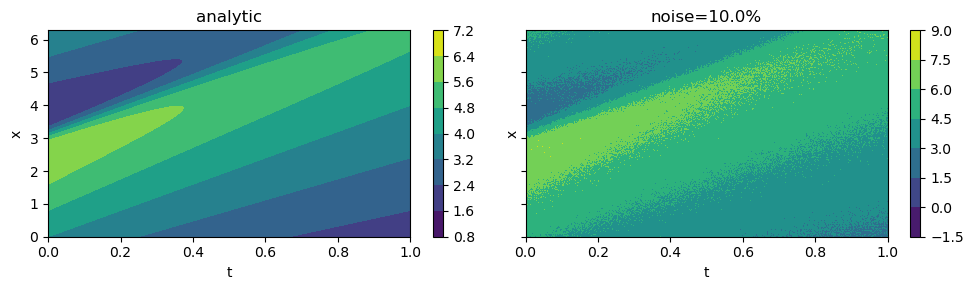

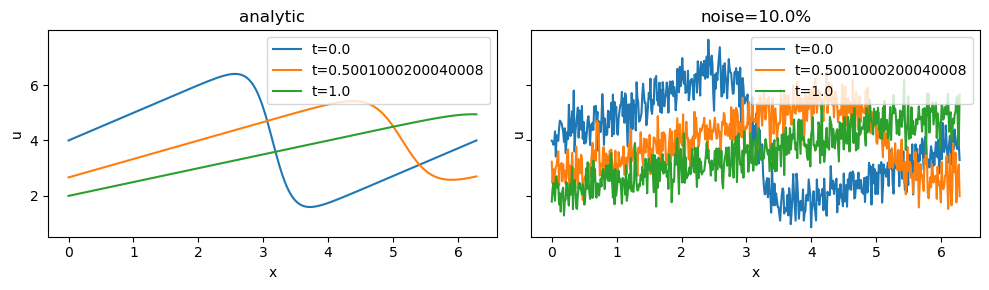

In [3]:
fig, axs = plt.subplots(
    nrows=1, ncols=2, 
    sharex=True, sharey=True,
    figsize=(10,3), dpi=100
)
titles=['analytic', 'noise={}%'.format(noise_level*100)]
for ifig, u in enumerate([u_analytical, u_noisy]):
    cax=axs[ifig].contourf(
        t, x, u
    )
    axs[ifig].set(
        title=titles[ifig],
        xlabel='t', ylabel='x'
    )
    fig.colorbar(cax, ax=axs[ifig])
fig.tight_layout()
plt.show()

fig, axs = plt.subplots(
    nrows=1, ncols=2, 
    sharex=True, sharey=True,
    figsize=(10, 3), dpi=100
)
titles=['analytic', 'noise={}%'.format(noise_level*100)]
for ifig, u in enumerate([u_analytical, u_noisy]):
    for i in [0,len(t)//2,-1]:
        axs[ifig].plot(
            x, u[:,i], label='t={}'.format(t[i])
        )
    axs[ifig].legend()
    axs[ifig].set(
        title=titles[ifig],
        xlabel='x', ylabel='u'
    )
fig.tight_layout()
plt.show()

In [4]:
from SPIDER_mod.sparse_identification_polyfit import sparse_identifier_polyfit
sip = sparse_identifier_polyfit(
    u_noisy, [x, t],
    N_iterations = 5,
    N_terms = [1,2,3,4,5],
    N_samples = 100,
    poly_degree = 3,
    i_pow = 3,
    j_pow = 3,
    i_frac = 0.25,
    j_frac = 0.25,
    RNG_seed = 314159
)
sip.iterate_sparse_identification()

In [5]:
print(sip.scores.shape)
print(sip.coefficients.shape)
print(sip.N_samples_actual)
print(len(sip.feature_names))
print(sip.feature_names)

(5, 5)
(5, 5, 13)
[ 99  97 100  98  96]
13
['f_t', 'f', 'f_tt', 'f_x', 'f_xx', 'f f', 'f f_t', 'f f_x', 'f f_tt', 'f f_xx', 'f_t f_t', 'f_t f_x', 'f_x f_x']


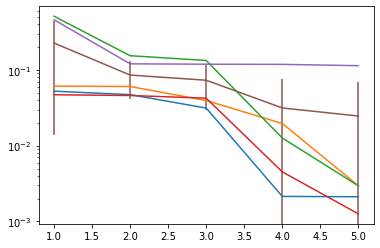

In [6]:
for scores in sip.scores:
    plt.errorbar(
        sip.N_terms,
        1 - scores
    )
plt.errorbar(
    sip.N_terms,
    np.mean(1 - sip.scores, axis=0),
    yerr=np.std(1 - sip.scores, axis=0),
)
plt.yscale('log')

In [7]:
for eqn in sip.equations:
    print(eqn[1])

u_t = -0.946 f f_x + -0.072 f
u_t = -0.952 f f_x + 0.014 f_t f_x
u_t = -0.298 f_t f_x + -0.142 f f
u_t = -4.214 f_x + -0.066 f_x f_x
u_t = 1.315 f_x f_x + -0.641 f
